In [1]:
import nltk
import string 
import re 
import os
import sklearn as sk
import math
import glob
from nltk.corpus import stopwords 
from nltk.tokenize import TweetTokenizer 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import operator
from numpy import genfromtxt
import matplotlib.pyplot as plt
import fileinput
from wordcloud import WordCloud

In [2]:
#Converting the data to lowercase
def text_lowercase(text): 
    return text.lower() 

In [3]:
#Removing the numbers
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

In [4]:
def remove_whitespace(text): 
    return  " ".join(text.split()) 

In [5]:
#Tweet Tokenizer, Remove punctuation, stop words
def tweet_tokenizer(text):
    
    tknzr = TweetTokenizer()
    tweet_words=tknzr.tokenize(text) 
    
    #Remove puncList
    puncList = [".",";",":","!","?","/","\\",",","$","&",")","(","\""]
    for punc in puncList:
        for word in tweet_words:
            tweet_words=[word.replace(punc,'PuncRemoved') for word in tweet_words]
    
    #Stop Words
    stop_words = stopwords.words('english') 
    stop_words.extend(['PuncRemoved'])
    final_words = [word for word in tweet_words if word not in stop_words]
    display(f"Tokenized words: {final_words}")
    return final_words

In [6]:
def preprocess(rawtext):
    rawtext1=text_lowercase(rawtext)
    rawtext2=remove_numbers(rawtext1)
    rawtext3=remove_whitespace(rawtext2)
    rawtext4=tweet_tokenizer(rawtext3)
    return rawtext4

In [9]:
def readandwrite_1file():
    Path = "\\TweetData\\"
    filelist = os.listdir(Path)
    for i in filelist:
        if i.endswith(".txt"):  # You could also add "and i.startswith('f')
            with open(Path + i, 'r') as f:
                for line in f:
                    final=preprocess(line)
                    with open('\\Result_file.txt', 'a+') as f:
                        for item in final:
                            f.write(item+",")
                        f.write("\n\n")

In [10]:
readandwrite_1file()

"Tokenized words: ['billie', 'eilish', 'talks', 'openly', 'mental', 'health', 'part', '#nowweretalking', 'campaign', '@hotpress', 'pick', 'copy', 'today', 'click', 'read']"

"Tokenized words: ['interviewed', 'many', 'inspirational', 'speakers', 'emotional-and', 'mental', 'health', 'summit', '@winningmindsirl', '@psyclingqueen', '@paulinerohdich', '@mama_tude', '@lvalloor', '@ravenkeyes', '@maryofinn', '#nowweretalking', '@magicofmusicire', '@zenlifeie', '@clearsightj', '@danielleserpico']"

"Tokenized words: ['big', 'thank', 'everyone', 'supported', 'us', 'event', 'lions', '@minicollett', '@kiriem', 'honoured', 'share', 'production', 'company', '@creativelions_', 'platform', '@thecreativealli', 'rich', 'talented', 'full', 'audience', 'making', 'shit', 'happen', '#nowweretalking', '#film']"

"Tokenized words: ['european', 'countries', 'establishing', 'leader', 'terms', 'environmental', '#sustainability', '@gretathunberg', '#europe', '#greeneconomy', '#sdgs', '#survey', '#debate', '#nowweretalking']"

"Tokenized words: ['nation', 'post-mortems', '#budget', 'funding', 'mental', 'health', 'services', 'funding', 'restore', 'services', 'rural', 'ireland', 'funding', 'community', 'health', 'services', 'part', 'mental', 'health', 'services', 'need', '#nowweretalking']"

"Tokenized words: ['interchangeable', 'heads', 'removable', 'arms', 'legs', 'robot', 'participates', 'development', 'children', 'language', 'motor', 'skills', 'head', 'different', 'shape', 'expression', 'helps', 'child', 'understand', 'express', 'emotions', '#nowweretalking']"

"Tokenized words: ['#nowweretalking', 'important', 'awarness', 'massive', 'knowcand', 'understand', 'better', 'everyone']"

"Tokenized words: ['seems', 'starting', 'route', 'heard', 'lovely', 'conversation', 'two', 'women', 'yesterday', 'discussing', 'mental', 'health', 'issues', 'seemed', 'find', 'comfort', 'stories', 'always', 'good', 'talk', '#nowweretalking']"

"Tokenized words: ['#nowweretalking', 'playlist', 'live', 'working', 'partnership', '@hotpress', 'curate', 'list', 'extraordinary', 'tracks', 'inspire', 'lead', 'world', 'mental', 'health', 'day', 'listen', 'spotify']"

"Tokenized words: ['shared', 'last', 'year', '#worldmentalhealthday', 'still', 'stand', 'every', 'word', 'everyone', 'needs', 'update', 'status', 'act', 'show', 'compassion', 'kind', '#nowweretalking']"

"Tokenized words: ['expressing', 'gratitude', 'bring', 'peace', 'past', 'contentment', 'present', 'hope', 'brighter', 'future', '#nowweretalking', '#mentalhealthawarenessweek', '#grateful']"

"Tokenized words: ['tomorrow', 'world', 'mental', 'health', 'day', 'know', 'important', 'mental', 'health', 'tomorrow', 'oct', 'th', 'running', 'talking-live', 'event', '@hotpress', '@pietahouse', 'encourage', 'young', 'people', 'open', 'join', 'us', 'online', 'using', '#nowweretalking', 'mental', 'health', 'unfortunately', 'something', 'people', 'shy', 'away', 'written', 'post', 'story', 'ok', 'talk', 'feel', '#nowweretalking', '#mentalhealth', '#mentalhealthawarenessweek']"

"Tokenized words: ['movie', 'joker', 'explores', 'mental', 'illness', 'challenging', 'engaging', 'way', 'difficult', 'watch', 'important', 'think', '#nowweretalking']"

"Tokenized words: ['thank', '@fleet_ap', 'support', 'different', 'types', 'communication', 'aac', 'awareness', 'week', 'year', 'long', '#nowweretalking', '@prcbrand', '@pecs_usa', '@msbrittanyslp', '@aps_slps', '@kellykrugatss', '@principal_fleet', '@aps_prc']"

"Tokenized words: ['taking', 'loan', 'makes', 'poorer', 'richer', '#wednesdaythoughts', '#nowweretalking', '#truthexposed']"

"Tokenized words: ['past', 'years', 'suffered', 'mental', 'health', 'problems', 'depression', 'severe', 'anxiety', 'paranoid', 'delusions', 'serious', 'times', 'lasted', 'months', 'needed', 'medication', 'help', 'luckily', 'going', 'good', 'period', 'recently', 'feel', 'good', '#nowweretalking']"

In [14]:
def texttoarray():
    text_file = open('\\Result_file.txt', "r")
    lines = text_file.read().split('\n\n')
    print (lines)
    print (len(lines))
    text_file.close()
    return lines

In [15]:
data1=texttoarray()

['billie,eilish,talks,openly,mental,health,part,#nowweretalking,campaign,@hotpress,pick,copy,today,click,read,', 'interviewed,many,inspirational,speakers,emotional-and,mental,health,summit,@winningmindsirl,@psyclingqueen,@paulinerohdich,@mama_tude,@lvalloor,@ravenkeyes,@maryofinn,#nowweretalking,@magicofmusicire,@zenlifeie,@clearsightj,@danielleserpico,', 'big,thank,everyone,supported,us,event,lions,@minicollett,@kiriem,honoured,share,production,company,@creativelions_,platform,@thecreativealli,rich,talented,full,audience,making,shit,happen,#nowweretalking,#film,', 'european,countries,establishing,leader,terms,environmental,#sustainability,@gretathunberg,#europe,#greeneconomy,#sdgs,#survey,#debate,#nowweretalking,', 'nation,post-mortems,#budget,funding,mental,health,services,funding,restore,services,rural,ireland,funding,community,health,services,part,mental,health,services,need,#nowweretalking,', 'interchangeable,heads,removable,arms,legs,robot,participates,development,children,langua

In [16]:
vec = CountVectorizer()
X = vec.fit_transform(data1)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(df.iloc[:16])
df.shape

,aac,act,always,and,anxiety,aps_prc,aps_slps,arms,audience,awareness,awarness,away,better,big,billie,brighter,bring,budget,campaign,challenging,child,children,clearsightj,click,comfort,communication,community,company,compassion,contentment,conversation,copy,countries,creativelions_,curate,danielleserpico,day,debate,delusions,depression,development,different,difficult,discussing,eilish,emotional,emotions,encourage,engaging,environmental,establishing,europe,european,event,every,everyone,explores,express,expressing,expression,extraordinary,feel,film,find,fleet_ap,full,funding,future,going,good,grateful,gratitude,greeneconomy,gretathunberg,happen,head,heads,health,heard,help,helps,honoured,hope,hotpress,illness,important,inspirational,inspire,interchangeable,interviewed,ireland,issues,join,joker,kellykrugatss,kind,kiriem,know,knowcand,language,last,lasted,lead,leader,legs,lions,list,listen,live,loan,long,lovely,luckily,lvalloor,magicofmusicire,makes,making,mama_tude,many,maryofinn,massive,medication,mental,mentalhealth,mentalhealthawarenessweek,minicollett,months,mortems,motor,movie,msbrittanyslp,nation,need,needed,needs,nowweretalking,oct,ok,online,open,openly,paranoid,part,participates,partnership,past,paulinerohdich,peace,pecs_usa,people,period,pick,pietahouse,platform,playlist,poorer,post,prcbrand,present,principal_fleet,problems,production,psyclingqueen,ravenkeyes,read,recently,removable,restore,rich,richer,robot,route,running,rural,sdgs,seemed,seems,serious,services,severe,shape,share,shared,shit,show,shy,skills,something,speakers,spotify,stand,starting,status,still,stories,story,suffered,summit,support,supported,survey,sustainability,taking,talented,talk,talking,talks,terms,th,thank,thecreativealli,think,times,today,tomorrow,tracks,truthexposed,two,types,understand,unfortunately,update,us,using,watch,way,wednesdaythoughts,week,winningmindsirl,women,word,working,world,worldmentalhealthday,written,year,years,yesterday,young,zenlifeie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

(16, 240)

In [110]:
def modifying_tweet_files():
    Path = "\\TweetData\\"
    save_path = "\\TweetDataProcessed\\"
    filelist = os.listdir(Path)
    for i in filelist:
        if i.endswith(".txt"):  # You could also add "and i.startswith('f')
            with open(Path + i, 'r') as f:
                for line in f:
                    final=preprocess(line)
                    datapassed="TweetData_processed"+str(i)
                    completeName = os.path.join(save_path, datapassed+".txt") 
                    with open(completeName, 'w+') as f:
                        for item in final:
                            f.write(item+" ")

In [111]:
modifying_tweet_files()

"Tokenized words: ['billie', 'eilish', 'talks', 'openly', 'mental', 'health', 'part', '#nowweretalking', 'campaign', '@hotpress', 'pick', 'copy', 'today', 'click', 'read']"

"Tokenized words: ['interviewed', 'many', 'inspirational', 'speakers', 'emotional-and', 'mental', 'health', 'summit', '@winningmindsirl', '@psyclingqueen', '@paulinerohdich', '@mama_tude', '@lvalloor', '@ravenkeyes', '@maryofinn', '#nowweretalking', '@magicofmusicire', '@zenlifeie', '@clearsightj', '@danielleserpico']"

"Tokenized words: ['big', 'thank', 'everyone', 'supported', 'us', 'event', 'lions', '@minicollett', '@kiriem', 'honoured', 'share', 'production', 'company', '@creativelions_', 'platform', '@thecreativealli', 'rich', 'talented', 'full', 'audience', 'making', 'shit', 'happen', '#nowweretalking', '#film']"

"Tokenized words: ['european', 'countries', 'establishing', 'leader', 'terms', 'environmental', '#sustainability', '@gretathunberg', '#europe', '#greeneconomy', '#sdgs', '#survey', '#debate', '#nowweretalking']"

"Tokenized words: ['nation', 'post-mortems', '#budget', 'funding', 'mental', 'health', 'services', 'funding', 'restore', 'services', 'rural', 'ireland', 'funding', 'community', 'health', 'services', 'part', 'mental', 'health', 'services', 'need', '#nowweretalking']"

"Tokenized words: ['interchangeable', 'heads', 'removable', 'arms', 'legs', 'robot', 'participates', 'development', 'children', 'language', 'motor', 'skills', 'head', 'different', 'shape', 'expression', 'helps', 'child', 'understand', 'express', 'emotions', '#nowweretalking']"

"Tokenized words: ['#nowweretalking', 'important', 'awarness', 'massive', 'knowcand', 'understand', 'better', 'everyone']"

"Tokenized words: ['seems', 'starting', 'route', 'heard', 'lovely', 'conversation', 'two', 'women', 'yesterday', 'discussing', 'mental', 'health', 'issues', 'seemed', 'find', 'comfort', 'stories', 'always', 'good', 'talk', '#nowweretalking']"

"Tokenized words: ['#nowweretalking', 'playlist', 'live', 'working', 'partnership', '@hotpress', 'curate', 'list', 'extraordinary', 'tracks', 'inspire', 'lead', 'world', 'mental', 'health', 'day', 'listen', 'spotify']"

"Tokenized words: ['shared', 'last', 'year', '#worldmentalhealthday', 'still', 'stand', 'every', 'word', 'everyone', 'needs', 'update', 'status', 'act', 'show', 'compassion', 'kind', '#nowweretalking']"

"Tokenized words: ['expressing', 'gratitude', 'bring', 'peace', 'past', 'contentment', 'present', 'hope', 'brighter', 'future', '#nowweretalking', '#mentalhealthawarenessweek', '#grateful']"

"Tokenized words: ['tomorrow', 'world', 'mental', 'health', 'day', 'know', 'important', 'mental', 'health', 'tomorrow', 'oct', 'th', 'running', 'talking-live', 'event', '@hotpress', '@pietahouse', 'encourage', 'young', 'people', 'open', 'join', 'us', 'online', 'using', '#nowweretalking', 'mental', 'health', 'unfortunately', 'something', 'people', 'shy', 'away', 'written', 'post', 'story', 'ok', 'talk', 'feel', '#nowweretalking', '#mentalhealth', '#mentalhealthawarenessweek']"

"Tokenized words: ['movie', 'joker', 'explores', 'mental', 'illness', 'challenging', 'engaging', 'way', 'difficult', 'watch', 'important', 'think', '#nowweretalking']"

"Tokenized words: ['thank', '@fleet_ap', 'support', 'different', 'types', 'communication', 'aac', 'awareness', 'week', 'year', 'long', '#nowweretalking', '@prcbrand', '@pecs_usa', '@msbrittanyslp', '@aps_slps', '@kellykrugatss', '@principal_fleet', '@aps_prc']"

"Tokenized words: ['taking', 'loan', 'makes', 'poorer', 'richer', '#wednesdaythoughts', '#nowweretalking', '#truthexposed']"

"Tokenized words: ['past', 'years', 'suffered', 'mental', 'health', 'problems', 'depression', 'severe', 'anxiety', 'paranoid', 'delusions', 'serious', 'times', 'lasted', 'months', 'needed', 'medication', 'help', 'luckily', 'going', 'good', 'period', 'recently', 'feel', 'good', '#nowweretalking']"

In [19]:
def tfidf():
    line=''
    s=set()
    flist=glob.glob(r'\\TweetDataProcessed\\*.txt') #get all the files from the d`#open each file >> tokenize the content >> and store it in a set
    for fname in flist:         
        tfile=open(fname,"r")
        line=tfile.read() # read the content of file and store in "line"
        tfile.close() # close the file
        s=s.union(set(line.split(' '))) # union of common words

    s=sorted(s) # sorts the content alphabetically


    i=0
    ct=0
    tf_line=''          
    doc_counts=[]       
    for term in s: #takes each term in the set 
        doc_counts.append(0)

        for fdoc in flist: # counts the no of times "term" is encountered in each doc

            doc=open(fdoc)
            line=doc.read()
            doc.close()
            ct=line.count(str(term)) #counts the no. of times "term" is present in the file
            tf_line+=str(ct)+',' #prints the count in each doc seperated by comma
            if (ct>0):              #counts no of docs in which 
                doc_counts[i]+=1    #this "term" is found
        i+=1
        tf_line=tf_line.strip()+'\n'    

    tf=[] #term Frequency
    idf=[]  #inverse document frequency      
    weights=[]      #weight
    total_docs=len(flist)   #total number of documents

    i=0

    for doc_count in doc_counts:    #takes the 1st doc count
        tf.append(doc_count) #Frequency of the words
        idf.append(math.log10(total_docs/doc_count)) #calculates idf for each "term"
        weights.append(idf[i]*doc_count) #calculate weight of the term
        i+=1



    final_line='TERM'+','       
    i=1
    for f in flist:
        final_line+='D'+str(i)+'  '+','
        i+=1
    final_line+=','+'TF'+','+'IDF(log10)'+','+'TF-IDF\n'


    tf_arr=tf_line.split('\n')



    i=0
    for term in s:
        final_line+=term+','+tf_arr[i]+','+str(tf[i])+','+str(round(idf[i],2))+','+str(round(weights[i],2))+'\n'
        i+=1

    fdoc="\\tfidftable.csv"
    outfile=open(fdoc,"w")
    outfile.write(final_line)
    outfile.close()

    print ("TF-IDF Table : ")


In [20]:
tfidf()
path = '\\tfidftable.csv'
df = pd.read_csv(path)
df=df.drop('Unnamed: 17', axis=1)
df=df.drop(df.index[0])
display(df)
print(df.shape)

TF-IDF Table : 


,TERM,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,TF,IDF(log10),TF-IDF
1,#budget,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1.20
2,#debate,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1.20
3,#europe,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1.20
4,#film,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1.20
5,#grateful,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.20,1.20
6,#greeneconomy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1.20
7,#mentalhealth,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,2,0.90,1.81
8,#mentalhealthawarenessweek,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0.90,1.81
9,#nowweretalking,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,16,0.00,0.00
10,#sdgs,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1.20


(239, 20)


In [66]:
#Generating file for developing Wordcloud in R
def wordclouddata():
    Path = "C:\\Users\\arshs\\Documents\\UCD_Practicals\\Text_Analysis_Practicals\\Assignment3\\TweetData\\"
    filelist = os.listdir(Path)
    for i in filelist:
        if i.endswith(".txt"):  # You could also add "and i.startswith('f')
            with open(Path + i, 'r') as f:
                for line in f:
                    final=preprocess(line)
                    with open('C:\\Users\\arshs\\Documents\\UCD_Practicals\\Text_Analysis_Practicals\\Assignment3\\Wordcloud_file.txt', 'a+') as f:
                        for item in final:
                            f.write(item+" ")

In [67]:
wordclouddata()

"Tokenized words: ['billie', 'eilish', 'talks', 'openly', 'mental', 'health', 'part', '#nowweretalking', 'campaign', '@hotpress', 'pick', 'copy', 'today', 'click', 'read']"

"Tokenized words: ['interviewed', 'many', 'inspirational', 'speakers', 'emotional-and', 'mental', 'health', 'summit', '@winningmindsirl', '@psyclingqueen', '@paulinerohdich', '@mama_tude', '@lvalloor', '@ravenkeyes', '@maryofinn', '#nowweretalking', '@magicofmusicire', '@zenlifeie', '@clearsightj', '@danielleserpico']"

"Tokenized words: ['big', 'thank', 'everyone', 'supported', 'us', 'event', 'lions', '@minicollett', '@kiriem', 'honoured', 'share', 'production', 'company', '@creativelions_', 'platform', '@thecreativealli', 'rich', 'talented', 'full', 'audience', 'making', 'shit', 'happen', '#nowweretalking', '#film']"

"Tokenized words: ['european', 'countries', 'establishing', 'leader', 'terms', 'environmental', '#sustainability', '@gretathunberg', '#europe', '#greeneconomy', '#sdgs', '#survey', '#debate', '#nowweretalking']"

"Tokenized words: ['nation', 'post-mortems', '#budget', 'funding', 'mental', 'health', 'services', 'funding', 'restore', 'services', 'rural', 'ireland', 'funding', 'community', 'health', 'services', 'part', 'mental', 'health', 'services', 'need', '#nowweretalking']"

"Tokenized words: ['interchangeable', 'heads', 'removable', 'arms', 'legs', 'robot', 'participates', 'development', 'children', 'language', 'motor', 'skills', 'head', 'different', 'shape', 'expression', 'helps', 'child', 'understand', 'express', 'emotions', '#nowweretalking']"

"Tokenized words: ['#nowweretalking', 'important', 'awarness', 'massive', 'knowcand', 'understand', 'better', 'everyone']"

"Tokenized words: ['seems', 'starting', 'route', 'heard', 'lovely', 'conversation', 'two', 'women', 'yesterday', 'discussing', 'mental', 'health', 'issues', 'seemed', 'find', 'comfort', 'stories', 'always', 'good', 'talk', '#nowweretalking']"

"Tokenized words: ['#nowweretalking', 'playlist', 'live', 'working', 'partnership', '@hotpress', 'curate', 'list', 'extraordinary', 'tracks', 'inspire', 'lead', 'world', 'mental', 'health', 'day', 'listen', 'spotify']"

"Tokenized words: ['shared', 'last', 'year', '#worldmentalhealthday', 'still', 'stand', 'every', 'word', 'everyone', 'needs', 'update', 'status', 'act', 'show', 'compassion', 'kind', '#nowweretalking']"

"Tokenized words: ['expressing', 'gratitude', 'bring', 'peace', 'past', 'contentment', 'present', 'hope', 'brighter', 'future', '#nowweretalking', '#mentalhealthawarenessweek', '#grateful']"

"Tokenized words: ['tomorrow', 'world', 'mental', 'health', 'day', 'know', 'important', 'mental', 'health', 'tomorrow', 'oct', 'th', 'running', 'talking-live', 'event', '@hotpress', '@pietahouse', 'encourage', 'young', 'people', 'open', 'join', 'us', 'online', 'using', '#nowweretalking', 'mental', 'health', 'unfortunately', 'something', 'people', 'shy', 'away', 'written', 'post', 'story', 'ok', 'talk', 'feel', '#nowweretalking', '#mentalhealth', '#mentalhealthawarenessweek']"

"Tokenized words: ['movie', 'joker', 'explores', 'mental', 'illness', 'challenging', 'engaging', 'way', 'difficult', 'watch', 'important', 'think', '#nowweretalking']"

"Tokenized words: ['thank', '@fleet_ap', 'support', 'different', 'types', 'communication', 'aac', 'awareness', 'week', 'year', 'long', '#nowweretalking', '@prcbrand', '@pecs_usa', '@msbrittanyslp', '@aps_slps', '@kellykrugatss', '@principal_fleet', '@aps_prc']"

"Tokenized words: ['taking', 'loan', 'makes', 'poorer', 'richer', '#wednesdaythoughts', '#nowweretalking', '#truthexposed']"

"Tokenized words: ['past', 'years', 'suffered', 'mental', 'health', 'problems', 'depression', 'severe', 'anxiety', 'paranoid', 'delusions', 'serious', 'times', 'lasted', 'months', 'needed', 'medication', 'help', 'luckily', 'going', 'good', 'period', 'recently', 'feel', 'good', '#nowweretalking']"

In [7]:
def wordclouddata_TF():
    path = '\\tfidftable.csv'
    df = pd.read_csv(path)
    df=df.drop('Unnamed: 17', axis=1)
    df=df.drop(df.index[0])
    df=df[['TERM','TF']]
    df=df.sort_values('TF',ascending=False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    df.to_csv(r'\\tfscoresonly.csv')
    display(df)

In [8]:
wordclouddata_TF()

,TERM,TF
9,#nowweretalking,16
210,talk,16
214,th,14
143,mental,11
105,health,9
226,us,8
71,day,6
157,part,4
88,everyone,3
112,important,3


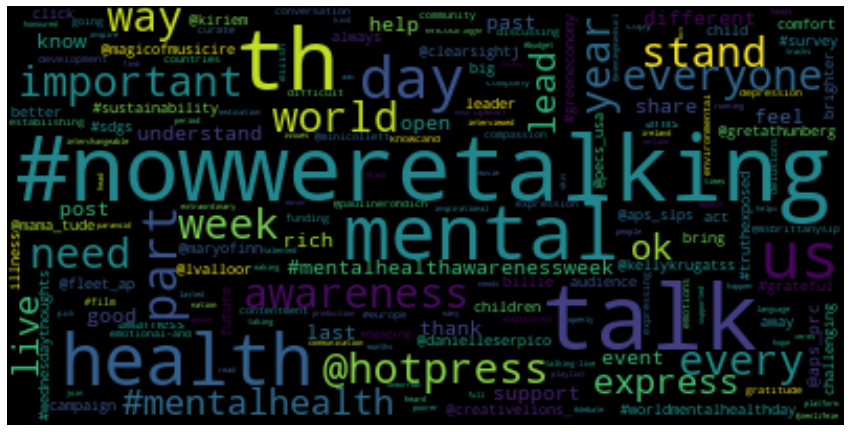

In [15]:
path = '\\tfscoresonly.csv'
df = pd.read_csv(path)
df=df[['TERM','TF']]
df=df.sort_values('TF',ascending=False)
WCList = df.values.tolist()

d = {}
for a, x in WCList:
    d[a] =x #Change the frequency if the smaller value of tfidf needs to be displayed in bigger size

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [135]:
def wordclouddata_TFIDF():
    path = '\\tfidftable.csv'
    df = pd.read_csv(path)
    df=df.drop('Unnamed: 17', axis=1)
    df=df.drop(df.index[0])
    df=df[['TERM','TF-IDF']]
    df=df.sort_values('TF-IDF',ascending=False)
    df.to_csv(r'\\tfidfscoresonly.csv')
    display(df)

In [136]:
wordclouddata_TFIDF()


,TERM,TF-IDF
71,day,2.56
226,us,2.41
157,part,2.41
105,health,2.25
88,everyone,2.18
198,stand,2.18
229,way,2.18
230,week,2.18
87,every,2.18
234,world,2.18


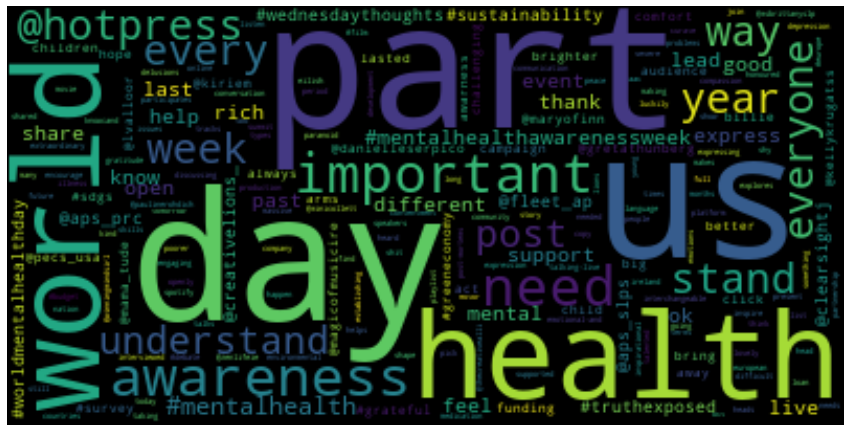

In [12]:
path = '\\tfidfscoresonly.csv'
df = pd.read_csv(path)
df=df[['TERM','TF-IDF']]
df=df.sort_values('TF-IDF',ascending=False)
WCList = df.values.tolist()

d = {}
for a, x in WCList:
    d[a] =x #Change the frequency if the smaller value of tfidf needs to be displayed in bigger size

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()